# Задания для самостоятельного решения

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

**Замечание: 2** Для зачета уже достаточно половины абсолютно верно решенных заданий. 

Если возникают сложности по ходу решения - пишите свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [1]:
# Загружаем библиотеки

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Генерируем наши выборки

np.random.seed(11)

A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [3]:
# H0 - Различия в эффекте между препаратами нет

from scipy.stats import mannwhitneyu # Импортируем критерий Манна-Уитни из пакета scipy для независимых выборок

stat, p = mannwhitneyu(A, B) # U-тест Манна-Уитни
print('Statistics = %.3f, p = %.3f' % (stat, p))

alpha = 0.05 # Уровень значимости

print()

if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics = 4343.000, p = 0.109

Одинаковые распределения (не отвергаем H0)


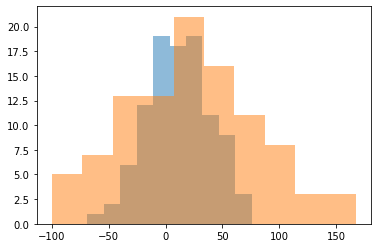

In [4]:
# Одинаковые распределения, не отвергаем HO

plt.hist(A, alpha=0.5)
plt.hist(B, alpha=0.5);

plt.show()

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [5]:
# Генерируем наши выборки

np.random.seed(11)

A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [6]:
# H0 - Различия в эффекте между препаратами нет

from scipy.stats import wilcoxon # Импортируем критерий Уилкоксона из пакета scipy для зависимых выборок

stat, p = wilcoxon(A, B) # Wilcoxon-Signed Rank Test

print('Statistics = %.3f, p = %.3f' % (stat, p))

alpha = 0.05 # Уровень значимости

print()

if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics = 1930.000, p = 0.041

Разные распределения (отвергаем H0)


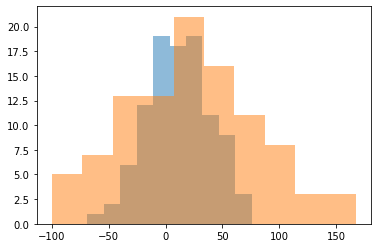

In [7]:
# Разные распределения, отвергаем HO

plt.hist(A, alpha=0.5)
plt.hist(B, alpha=0.5);

plt.show()

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [8]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [9]:
# H0 - эффекта от удобрений нет

from scipy.stats import f_oneway # Импортирем функцию для дисперсионного анализа из библиотеки scipy пакета stats

F, p = f_oneway(water, nutri, mineral)  # Проводим дисперсионный анализ

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты дисперсионного анализа

print()

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

12.525963044834192 2.9240047906326866e-05

Разное распределение (отклоняем H0)


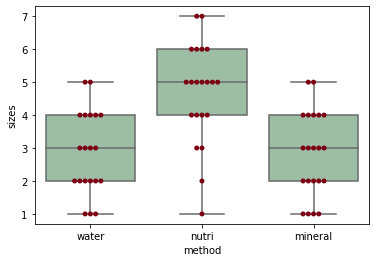

In [10]:
# Немного преобразуем данные

sizes = water+nutri+mineral
kinds = ['water']*len(water) + ['nutri']*len(nutri)+['mineral']*len(mineral)
df_mid = pd.DataFrame()
df_mid['sizes'] = sizes
df_mid['method'] = kinds


ax = sns.boxplot(x='method', y='sizes', data=df_mid, color='#99c2a2')
ax = sns.swarmplot(x="method", y="sizes", data=df_mid, color='#7d0013')

plt.show()

Питательные удобрения имею наибольший эффект

# Cookie Cats (Обязательно)

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [11]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False) # Откроем датасет

data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - пользователь вернулся и поиграл через 1 день после установки?
* `retention_7` - пользователь вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [12]:
# Сгрупируем результаты теста по версиям игры.

data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Группы игроков примерно равны по количеству

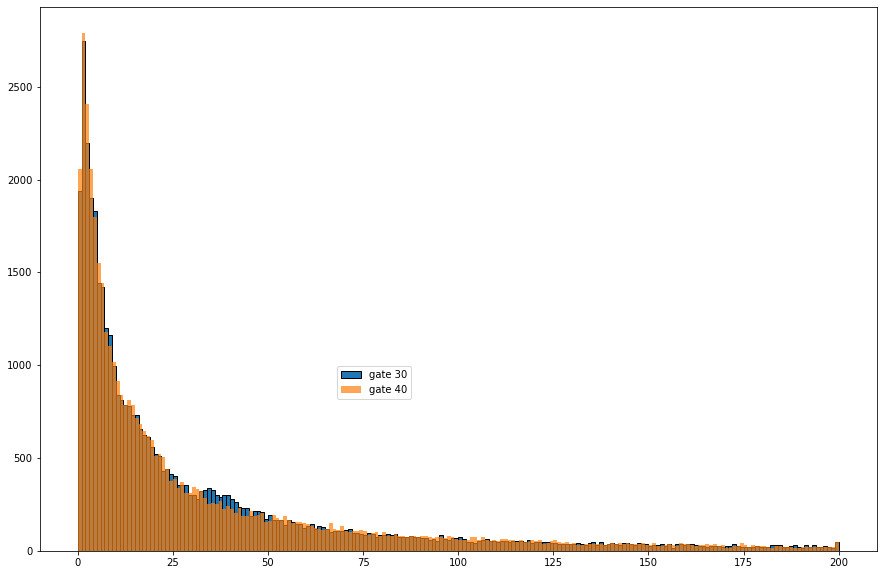

In [13]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)

bins = 200

plt.figure(figsize=(15, 10))

plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')

plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()


На первый взгляд различий нет

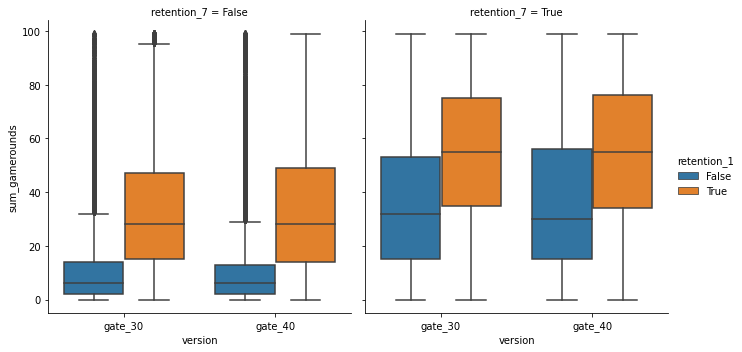

In [14]:
df = data.loc[data['sum_gamerounds'] < 100].copy();

sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);

<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

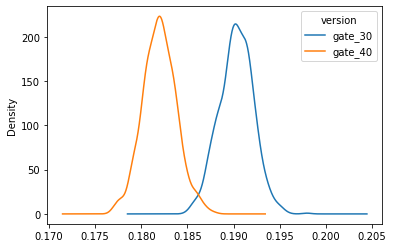

In [15]:
# Если вдруг оказалось сложно, то вот еще один способ визуализации различий

plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean() # retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
boot_1d.plot(kind='density')

In [16]:
from scipy.stats import f_oneway 
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu # Исходи из того, что выборки независимы
import scipy.stats as stats

# H0 - различий где установить ворота нет

f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
f, p

alpha = 0.05  # Уровень значимости

print(F, p)   # Смотрим на результаты дисперсионного анализа

print()

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

12.525963044834192 0.3729086824696095

Одинаковое распределение (не отвергаем H0)


#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [17]:
# H0 - различий где установить ворота нет

stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])

print('Statistics = %.3f, p = %.3f' % (stat, p))

alpha = 0.05 # Уровень значимости

print()

if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics = 1024331250.500, p = 0.050

Одинаковые распределения (не отвергаем H0)


**Ваши выводы?** 

 Нет значительных различий между установкой ворот на 30 или 40 уровне игры

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [18]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

# Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, 
# что они имеют одинаковую значимость.

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [19]:
# Разделим наши данные

grass_ATK1 = pokemon[(pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock')]['Attack']
grass_ATK2 = pokemon[(pokemon['Class 2'] == 'Grass') & (pokemon['Class 1'] != 'Rock')]['Attack']
grass_ATK = pd.concat([grass_ATK1, grass_ATK2])

rock_ATK1 = pokemon[(pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass')]['Attack']
rock_ATK2 = pokemon[(pokemon['Class 2'] == 'Rock') & (pokemon['Class 1'] != 'Grass')]['Attack']
rock_ATK = pd.concat([rock_ATK1, rock_ATK2])

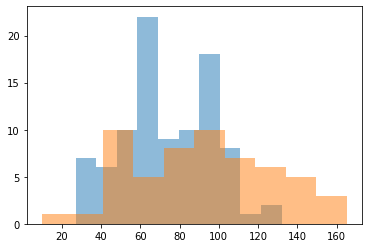

In [20]:
# Визуализируем наши данные

plt.hist(grass_ATK, alpha=0.5)
plt.hist(rock_ATK, alpha=0.5);

plt.show()

In [21]:
# H0 - атаки не различаются

stat, p = mannwhitneyu(grass_ATK, rock_ATK) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретируем

alpha = 0.05   # Уровень значимости

print()

if p > alpha:
    print('Одинаковые распределения (не отвергаем H0) - Оук ошибся, разницы в атаке нет')
else:
    print('Разные распределения (отвергаем H0) - Похоже, что разница в атаке существует')

Statistics=1816.500, p=0.002

Разные распределения (отвергаем H0) - Похоже, что разница в атаке существует


<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [22]:
# Разделим наши данные

water_SPD1 = pokemon[(pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal')]['Speed']
water_SPD2 = pokemon[(pokemon['Class 2'] == 'Water') & (pokemon['Class 1'] != 'Normal')]['Speed']
water_SPD = pd.concat([water_SPD1, water_SPD2])

normal_SPD1 = pokemon[(pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water')]['Speed']
normal_SPD2 = pokemon[(pokemon['Class 2'] == 'Normal') & (pokemon['Class 1'] != 'Water')]['Speed']
normal_SPD = pd.concat([normal_SPD1, normal_SPD2])

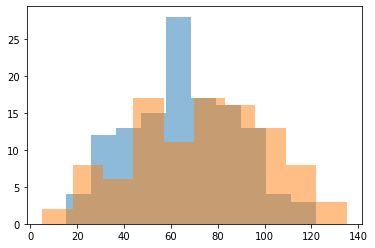

In [23]:
# Визуализируем наши данные

plt.hist(water_SPD, alpha=0.5)
plt.hist(normal_SPD, alpha=0.5);

plt.show()

In [24]:
# H0 - скорости не различаются

stat, p = mannwhitneyu(grass_ATK, rock_ATK) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретируем

alpha = 0.05   # Уровень значимости

print()

if p > alpha:
    print('Одинаковые распределения (не отвергаем H0) - Оук ошибся, разницы в скорости нет')
else:
    print('Разные распределения (отвергаем H0) - Похоже, что разница в скорости существует')

Statistics=1816.500, p=0.002

Разные распределения (отвергаем H0) - Похоже, что разница в скорости существует


<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [25]:
# Это задание повторяется ниже

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [26]:
# Покемоны, которые принимали сыворотку увеличения скорости

treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [27]:
# Разделим наши данные

All_pokemon = pokemon.loc[~pokemon['Name'].isin(treathed_pokemon)]['Speed']
Boost_pokemon = pokemon.loc[pokemon['Name'].isin(treathed_pokemon)]['Speed']

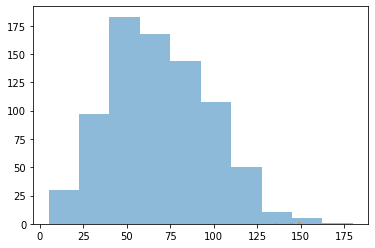

In [28]:
# Визуализируем наши данные

plt.hist(All_pokemon, alpha=0.5)
plt.hist(Boost_pokemon, alpha=0.5);

plt.show()

In [29]:
# H0 - скорости не различаются, сыворотка не работает

stat, p = mannwhitneyu(grass_ATK, rock_ATK) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретируем

alpha = 0.05   # Уровень значимости

print()

if p > alpha:
    print('Одинаковые распределения (не отвергаем H0) - Оук ошибся, сыворотка не работает')
else:
    print('Разные распределения (отвергаем H0) - Похоже, что сыворотка работает')

Statistics=1816.500, p=0.002

Разные распределения (отвергаем H0) - Похоже, что сыворотка работает


<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [30]:
# Разделим наши данные

Simple_pokemon = pokemon[pokemon['Legendary'] == False]
Legendary_pokemon = pokemon[pokemon['Legendary'] == True]

In [31]:
# Получаем массивы сумм и произведений характеристик для каждой группы

SP_sum = Simple_pokemon[['HP','Attack','Defense']].sum(axis=1)
LG_sum = Legendary_pokemon[['HP','Attack','Defense']].sum(axis=1)

SP_prod = Simple_pokemon[['HP','Attack','Defense']].prod(axis=1)
LG_prod = Legendary_pokemon[['HP','Attack','Defense']].prod(axis=1)

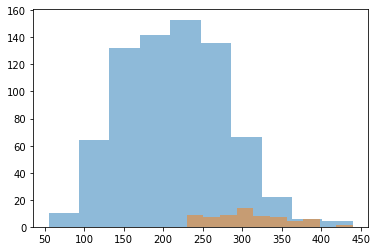

In [32]:
# Визуализируем наши данные с суммами характеристик

plt.hist(SP_sum, alpha=0.5)
plt.hist(LG_sum, alpha=0.5);

plt.show()

In [33]:
# H0 - Легендарные покемоны не лучше чем обычные (сумма параметров)

F, p = f_oneway(SP_sum, LG_sum)  # Дисперсионный анализ

alpha = 0.05  # Уровень значимости

print(F, p)   # Смотрим на результаты дисперсионного анализа

print()

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

134.371041285858 7.97094220572035e-29

Разное распределение (отклоняем H0)


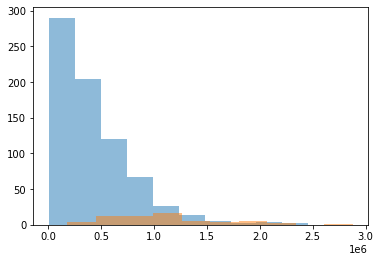

In [34]:
# Визуализируем наши данные с произведениями характеристик

plt.hist(SP_prod, alpha=0.5)
plt.hist(LG_prod, alpha=0.5);

plt.show()

In [35]:
# H0 - Легендарные покемоны не лучше чем обычные (произведение параметров)

F, p = f_oneway(SP_prod, LG_prod)  # Дисперсионный анализ

alpha = 0.05  # Уровень значимости

print(F, p)   # Смотрим на результаты дисперсионного анализа

print()

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

175.9138909709736 1.9926643088419018e-36

Разное распределение (отклоняем H0)


<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 

</div>

In [36]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [37]:
from itertools import chain # Библиотека которую я использую в своем решении

# Разделим наши данные

stats_DEF = {} # Словарь
i=0 # Счетчик

for a in best_defence_class:
    a_list = [] # Массив
    i+=1 # Счетчик + 1
    for b in best_defence_class:
        if a == b:
            print('Шаг',i)
        else:
            c = pokemon[(pokemon['Class 1'] == a) & (pokemon['Class 2'] != b)]['Defense'] # Поиск покемона в 1 классе
            d = pokemon[(pokemon['Class 2'] == a) & (pokemon['Class 1'] != b)]['Defense'] # Поиск покемона во 2 классе
            e = pd.concat([c, d]) # Объединяем найденные результаты
            a_list.append(e) # Добавляем их в наш массив
    a_list  = list(chain.from_iterable(a_list )) # Объединяем массивы внутри массива
    stats_DEF[a] = a_list # Добавляем данные в словарь

print('Алгоритм выполнен')

Шаг 1
Шаг 2
Шаг 3
Шаг 4
Алгоритм выполнен


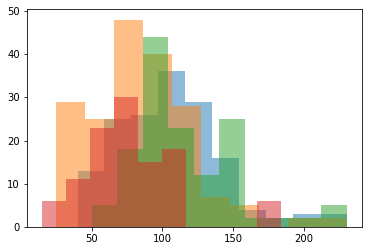

In [38]:
# Визуализируем наши данные с произведениями характеристик

for a in best_defence_class:
    plt.hist(stats_DEF.get(a), alpha=0.5)

plt.show()

In [39]:
# H0 - Нет статистически значимых различий по защите между группами

group1 = stats_DEF.get('Rock')
group2 = stats_DEF.get('Ground')
group3 = stats_DEF.get('Steel')
group4 = stats_DEF.get('Ice')

F, p = f_oneway(group1, group2, group3, group4)  # Дисперсионный анализ

alpha = 0.05  # Уровень значимости

print(F, p)   # Смотрим на результаты дисперсионного анализа

print()

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

30.449994822298095 2.64125621241588e-18

Разное распределение (отклоняем H0)
